# Machine Learning Ex1

## Introduction

### Objective

Deliverables: 
10-15 page report (with tables and diagrams), code and scripts.

Goal:
Predict who wrote the review.

## Setup

### Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Configuration

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]

# define plt and sns styles
sns.set_style("whitegrid")
sns.set_palette("Set2")

This experiment was done on a ryzen 3 3300x paired with a rtx 3070

## Data Loading

In [3]:
df_train = pd.read_csv('data/student-mat-processed.csv')
df_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,18,0,1,1,4,4,2,2,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,17,0,1,0,1,1,1,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,15,0,0,0,1,1,1,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,0,15,0,1,0,4,2,1,3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,16,0,1,0,3,3,1,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<Axes: >

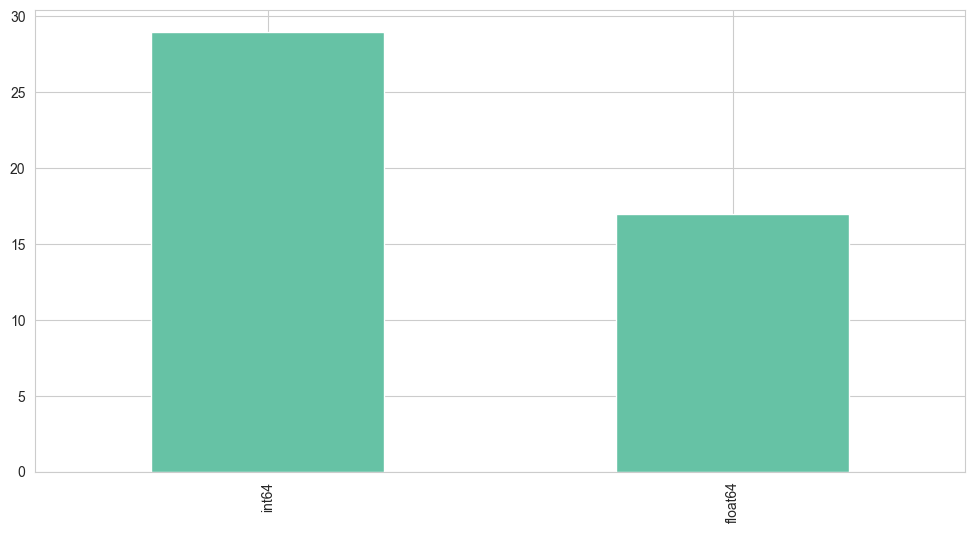

In [4]:
df_train.dtypes.value_counts().plot(kind='bar')

In [5]:
# look at all float types
df_train.select_dtypes(include=['float64']).head()

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# check if the float types have numbers after the decimal point
df_train.select_dtypes(include=['float64']).head().iloc[0]

Mjob_at_home         1.0
Mjob_health          0.0
Mjob_other           0.0
Mjob_services        0.0
Mjob_teacher         0.0
Fjob_at_home         0.0
Fjob_health          0.0
Fjob_other           0.0
Fjob_services        0.0
Fjob_teacher         1.0
reason_course        1.0
reason_home          0.0
reason_other         0.0
reason_reputation    0.0
guardian_father      0.0
guardian_mother      1.0
guardian_other       0.0
Name: 0, dtype: float64

In [7]:
# transform all floats to ints
df_train = df_train.astype('int64')

## Data Cleaning and Preprocessing


In [8]:
# Splitting of the target column
X_train = df_train.drop(['G1', 'G2', 'G3'], axis=1)
y_train = df_train['G3']
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,18,0,1,1,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,0,17,0,1,0,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,0,15,0,0,0,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,0,15,0,1,0,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,0,16,0,1,0,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [9]:
# count the number of unique values in g3 column
y_train.nunique()

18

In [10]:
y_train.value_counts()

G3
10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: count, dtype: int64

In [11]:
# create bins for the labels which are portuguese grades
bins = [y_train.min(), 10, 14, 16, y_train.max()]
labels = [0, 1, 2, 3]
y_train = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True)
y_train.value_counts()

G3
0    186
1    136
2     49
3     24
Name: count, dtype: int64

### Checking for missing values

In [12]:
# Checking for null values
print(f'Amount null values in X_train: {X_train.isnull().sum().sum()}')
print(f'Amount null values in y_train: {y_train.isnull().sum().sum()}')

Amount null values in X_train: 0
Amount null values in y_train: 0


In [13]:
# stratified shuffle split into train and validation set
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

## Methods

In [14]:
def apply_scaling(X_train, X_vali):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_vali_scaled = scaler.transform(X_vali)

    df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    df_vali_scaled = pd.DataFrame(X_vali_scaled, columns=X_vali.columns)

    return df_train_scaled, df_vali_scaled

In [15]:
def apply_outlier_removal(X_train, y_train, factor=1.5):
    # Calculate the IQR for each column
    Q1 = np.quantile(X_train, 0.25, axis=0)
    Q3 = np.quantile(X_train, 0.75, axis=0)
    IQR = Q3 - Q1

    # Outlier detection
    outliers = (X_train < Q1 - factor * IQR) | (X_train > Q3 + factor * IQR)

    # The dataset has many columns with outliers, 
    # so we will remove rows where the number of 
    # outliers exceeds 10% of the total number of columns
    threshold = max(1, int(0.1 * X_train.shape[1]))
    rows_to_remove = outliers.sum(axis=1) >= threshold

    # Only remove rows where the number of outliers exceeds the maximum
    X_clean = X_train[~rows_to_remove]
    y_clean = y_train[~rows_to_remove]

    return X_clean, y_clean

In [16]:
def calculate_optimal_pca(X_train):
    pca = PCA()
    pca.fit(X_train)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # plt.figure()
    # plt.plot(explained_variance)
    # plt.xlabel('Number of Components')
    # plt.ylabel('Variance (%)')
    # plt.title('Explained Variance')
    # plt.grid(True)
    # plt.show()

    n_components = np.where(explained_variance > 0.95)[0][0] + 1
    return n_components

In [18]:
def apply_pca(X_train, X_vali, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_vali_pca = pca.transform(X_vali)

    X_train_pca = pd.DataFrame(data=X_train_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
    X_vali_pca = pd.DataFrame(data=X_vali_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

    return X_train_pca, X_vali_pca

## Modeling

In [19]:
# Main experiment function
def run_experiment(X_train, X_vali, y_train, y_vali, algorithm_func, use_pca=False, remove_outliers=False, scale_data=False):

    if remove_outliers:
        X_train, y_train = apply_outlier_removal(X_train, y_train) 
        assert X_train.shape[0] == y_train.shape[0], "X_train and y_train should have the same amount of rows"
        assert X_train.shape[0] > 0, "X_train has no rows left"

    if scale_data:
        X_train, X_vali = apply_scaling(X_train, X_vali)

    if use_pca:
        n_components = calculate_optimal_pca(X_train)
        X_train, X_vali = apply_pca(X_train, X_vali, n_components)

    prediction = algorithm_func.fit(X_train, y_train).predict(X_vali)

    conf_matrix = confusion_matrix(y_vali, prediction)

    metrics = {
        'accuracy': accuracy_score(prediction, y_vali),
        'precision': precision_score(prediction, y_vali, average='macro', zero_division=1),
        'recall': recall_score(prediction, y_vali, average='macro', zero_division=1),
        'f1': f1_score(prediction, y_vali, average='macro')
    }
    return metrics, conf_matrix

In [20]:
from sklearn.model_selection import KFold

def run_experiment_with_changes_cv(X_train, X_vali, y_train, y_vali, algorithm_func, use_pca=False, remove_outliers=False, scale_data=False):

    # Concatenate the training and validation sets
    X_train = pd.concat([X_train, X_vali])
    y_train = np.concatenate([y_train, y_vali])

    # Initialize KFold cross-validation
    kfold = KFold(n_splits=3)

    # Initialize a overall confusion matrix based on the number of classes
    unique_classes = np.unique(y_train)
    overall_confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))


    results_per_fold = []

    # Perform cross-validation
    for train_index, vali_index in kfold.split(X_train):
        # Split the training data into training and validation sets
        X_train_cv, X_vali_cv = X_train.iloc[train_index], X_train.iloc[vali_index]
        y_train_cv, y_vali_cv = y_train[train_index], y_train[vali_index]

        # Apply outlier removal if necessary
        if remove_outliers:
            X_train_cv, y_train_cv = apply_outlier_removal(X_train_cv, y_train_cv)
            assert X_train_cv.shape[0] == y_train_cv.shape[0], "X_train and y_train should have the same amount of rows"
            assert X_train_cv.shape[0] > 0, "X_train has no rows left"

        # Apply scaling if necessary
        if scale_data:
            X_train_cv, X_vali_cv = apply_scaling(X_train_cv, X_vali_cv)

        # Apply PCA if necessary
        if use_pca:
            n_components = calculate_optimal_pca(X_train_cv)
            X_train_cv, X_vali_cv = apply_pca(X_train_cv, X_vali_cv, n_components=n_components)

        # Initialize GridSearchCV with the estimator returned by algorithm_func
        prediction = algorithm_func.fit(X_train_cv, y_train_cv).predict(X_vali_cv)

        overall_confusion_matrix += confusion_matrix(y_vali_cv, prediction)

        metrics = {
            'accuracy': accuracy_score(prediction, y_vali_cv),
            'precision': precision_score(prediction, y_vali_cv, average='macro', zero_division=1),
            'recall': recall_score(prediction, y_vali_cv, average='macro', zero_division=1),
            'f1': f1_score(prediction, y_vali_cv, average='macro')
        }
        results_per_fold.append(metrics)

    cv_results_df = pd.DataFrame(results_per_fold)
    # just return the mean for every metric
    mean_metrics = cv_results_df.mean().to_dict()

    return mean_metrics, overall_confusion_matrix

In [121]:
from sklearn.model_selection import ParameterGrid
import time
results = []

param_grid = {
    'decision_tree_classifier': list(ParameterGrid({
        'max_depth': [10, 50, None],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
        'criterion': ['gini', 'entropy']
    })),
    'svm_classifier': list(ParameterGrid({
        'C': [0.01, 1, 10],
        'kernel': ['linear'],
    })),
    'knn_classifier': list(ParameterGrid({
        'n_neighbors': [3, 10, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'minkowski']
    }))
}

algorithms = {
        'decision_tree_classifier': DecisionTreeClassifier(),
        'svm_classifier': SVC(),
        'knn_classifier': KNeighborsClassifier()
    }

for algorithm_key, algorithm in algorithms.items():
    print(f'Starting with {algorithm_key}...')
    if algorithm_key in param_grid:
        for use_pca in [True, False]:
            for scale_data in [True, False]:
                for remove_outliers in [True, False]:
                    for validation_method in ['cross_validation', 'holdout']:

                        print(f'Running {algorithm_key} with use_pca={use_pca}, scale_data={scale_data}, remove_outliers={remove_outliers}, validation_method={validation_method}...')
                        if validation_method == 'holdout':
                            default_algorithm = type(algorithm)()
                            start_time = time.time()
                            metrics, conf_matrix = run_experiment(
                                X_train, 
                                X_vali, 
                                y_train, 
                                y_vali, 
                                algorithm_func=algorithm, 
                                use_pca=use_pca, 
                                remove_outliers=remove_outliers, 
                                scale_data=scale_data
                            )
                            results.append({
                            'algorithm': algorithm_key,
                            'validation_method': validation_method,
                            'remove_outliers': remove_outliers,
                            'scale_data': scale_data,
                            'use_pca': use_pca,
                            'params': 'default',
                            'time': end_time - start_time,
                            'conf_matrix': conf_matrix.tolist(), # Convert to list to be able to serialize to JSON
                            **metrics
                            })
                        elif validation_method == 'cross_validation':
                            # loop over the parameters for the current algorithm
                            for param in param_grid[algorithm_key]:
                                algorithm.set_params(**param)
                                start_time = time.time()
                                mean_metrics, conf_matrix = run_experiment_with_changes_cv(
                                    X_train, 
                                    X_vali, 
                                    y_train, 
                                    y_vali, 
                                    algorithm_func=algorithm, 
                                    use_pca=use_pca, 
                                    remove_outliers=remove_outliers, 
                                    scale_data=scale_data
                                )
                                end_time = time.time()
                                results.append({
                                    'algorithm': algorithm_key,
                                    'validation_method': validation_method,
                                    'remove_outliers': remove_outliers,
                                    'scale_data': scale_data,
                                    'use_pca': use_pca,
                                    'params': param,
                                    'time': end_time - start_time,
                                    'conf_matrix': conf_matrix.tolist(),
                                    **mean_metrics
                                })
    print('\n\n')

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

Starting with decision_tree_classifier...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=True, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=True, validation_method=holdout...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=False, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=False, validation_method=holdout...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove_outliers=True, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove_outliers=True, validation_method=holdout...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove_outliers=False, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove

In [4]:
results_df= pd.read_csv('results-mat.csv')

In [5]:
results_df.sort_values(by='f1', ascending=False, inplace=True)

algorithm                                               svm_classifier
validation_method                                              holdout
remove_outliers                                                   True
scale_data                                                        True
use_pca                                                           True
params                                                         default
time                                                               0.0
conf_matrix          [[28, 7, 2, 0], [16, 10, 0, 1], [2, 4, 3, 1], ...
accuracy                                                      0.518987
precision                                                     0.356782
recall                                                        0.378103
f1                                                            0.358456
Name: 443, dtype: object


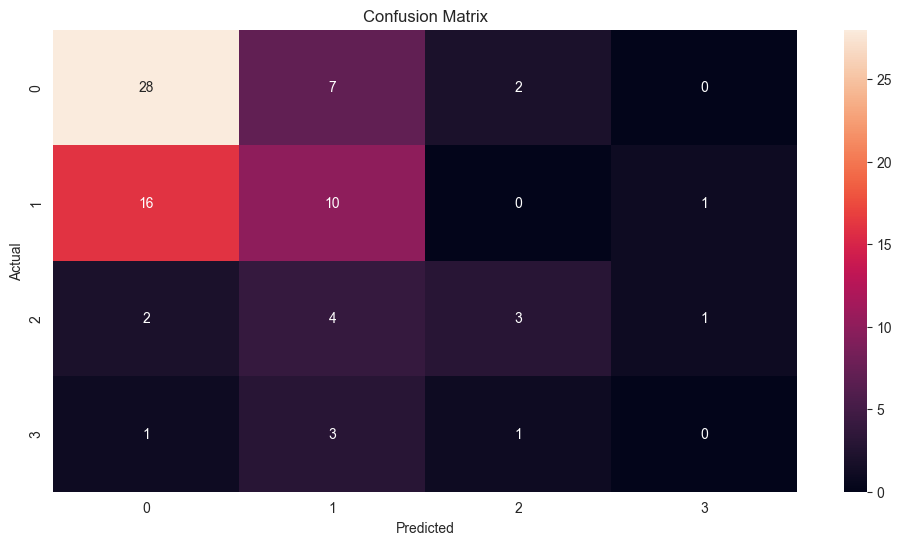

In [7]:
import json
# plot the confusion matrix of the best model
print(results_df.iloc[0])
conf_matrix = results_df.iloc[0]['conf_matrix']
conf_matrix_string = conf_matrix.replace("'", '"')

# Parse the string as JSON
conf_matrix_list = json.loads(conf_matrix_string)

# Convert the parsed list into a NumPy array
conf_matrix = np.array(conf_matrix_list)

conf_matrix = pd.DataFrame(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('images/mat/confusion_matrix.png')

In [127]:
# save as csv
results_df.to_csv('results-mat.csv', index=False)

In [118]:
results_df = pd.read_csv('results-mat.csv')

In [128]:
results_df[results_df['validation_method'] == 'cross_validation'].sort_values(by='f1', ascending=False).groupby('algorithm').head(1)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,params,time,conf_matrix,accuracy,precision,recall,f1
466,svm_classifier,cross_validation,True,False,False,"{'C': 10, 'kernel': 'linear'}",0.463083,"[[117.0, 49.0, 15.0, 5.0], [61.0, 52.0, 13.0, ...",0.465726,0.358418,0.350277,0.351691
94,decision_tree_classifier,cross_validation,False,True,True,"{'criterion': 'entropy', 'max_depth': 50, 'min...",0.098633,"[[110.0, 65.0, 10.0, 1.0], [58.0, 51.0, 23.0, ...",0.435365,0.313749,0.331413,0.316316
541,knn_classifier,cross_validation,False,True,False,"{'metric': 'euclidean', 'n_neighbors': 15, 'we...",0.054324,"[[134.0, 51.0, 1.0, 0.0], [76.0, 59.0, 1.0, 0....",0.496222,0.311795,0.572032,0.300629


<Axes: xlabel='algorithm'>

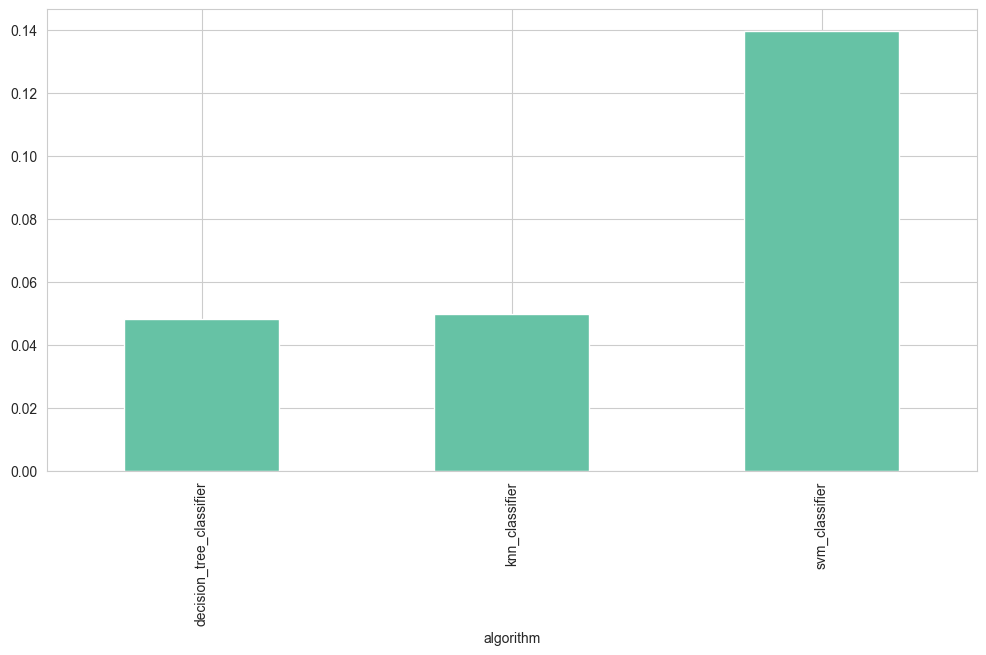

In [129]:
# plot the time difference between the models
results_df['time'] = results_df['time'].astype('float64')
results_df.groupby('algorithm')['time'].mean().plot(kind='bar')

In [130]:
results_df[results_df['validation_method'] == 'holdout'].sort_values(by='f1', ascending=False).groupby('algorithm').head(1)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,params,time,conf_matrix,accuracy,precision,recall,f1
443,svm_classifier,holdout,True,True,True,default,0.0,"[[28, 7, 2, 0], [16, 10, 0, 1], [2, 4, 3, 1], ...",0.518987,0.356782,0.378103,0.358456
54,decision_tree_classifier,holdout,True,True,True,default,0.0,"[[20, 13, 1, 3], [7, 18, 1, 1], [1, 8, 1, 0], ...",0.493671,0.326802,0.360398,0.318548
510,knn_classifier,holdout,True,False,True,default,0.0,"[[27, 10, 0, 0], [14, 13, 0, 0], [2, 8, 0, 0],...",0.506329,0.302803,0.745224,0.270984


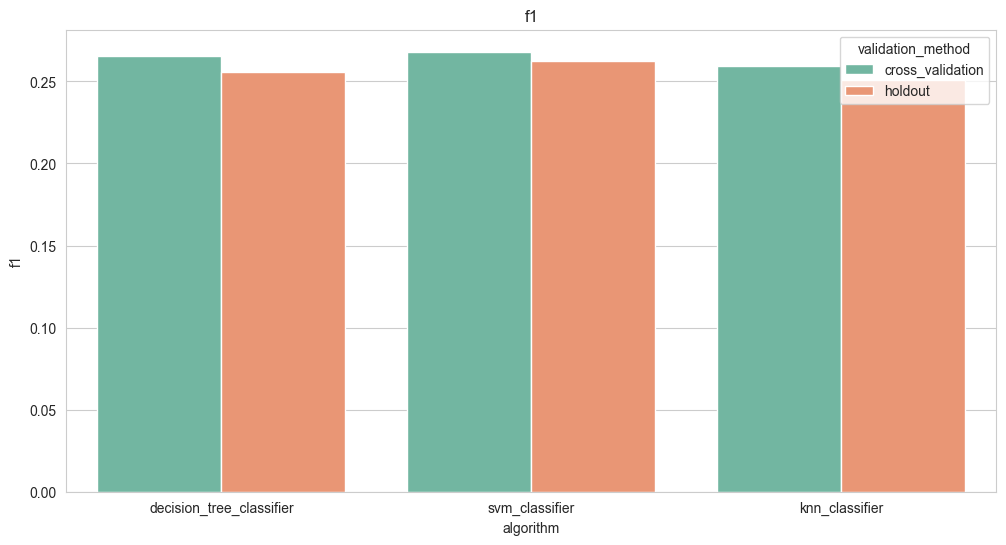

In [131]:
# plot the performance measures in comparision to each other
# TODO: Festlegung auf einen Score (f1)
sns.barplot(data=results_df, x='algorithm', y='f1', hue='validation_method', errorbar=None)
plt.title('f1')
plt.savefig('images/mat/f1.png')

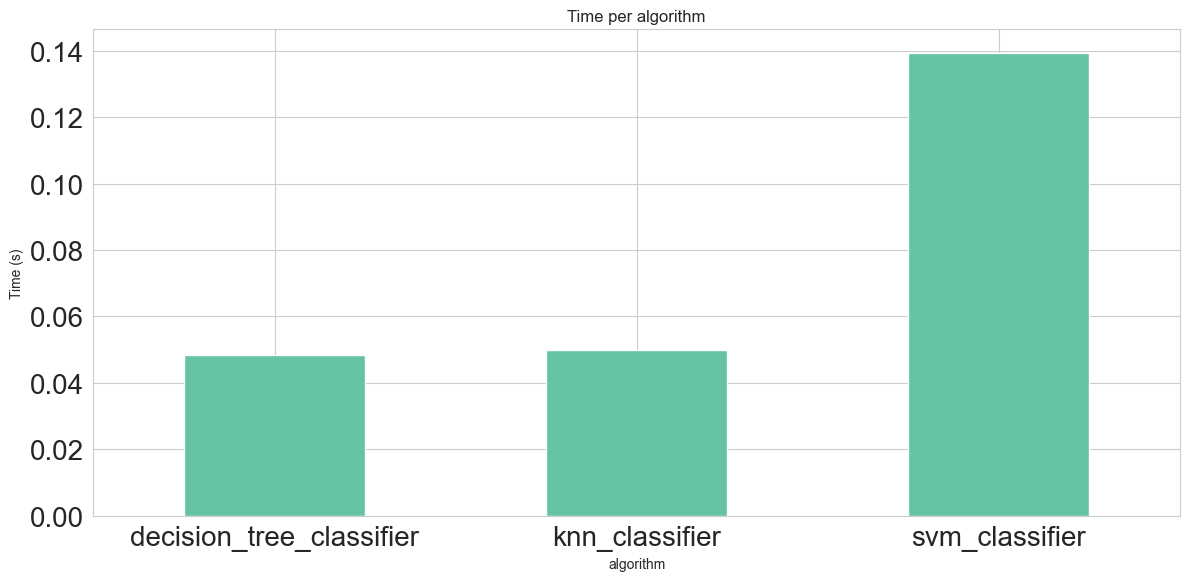

In [132]:
# plot the time difference between the models
results_df['time'] = results_df['time'].astype('float64')
results_df.groupby('algorithm')['time'].mean().plot(kind='bar')
plt.ylabel('Time (s)')
plt.xticks(rotation=0, ha='center')
# make text bigger
plt.gcf().axes[0].tick_params(labelsize=20)
# also make the other text bigger
plt.title('Time per algorithm', fontsize=20)
plt.tight_layout()
plt.title('Time per algorithm')
plt.savefig('images/time.png')

In [133]:
# encode the categorical variables in results_df and save the label meaning
from sklearn.preprocessing import OrdinalEncoder
encoder1 = OrdinalEncoder()
results_df['algorithm'] = encoder1.fit_transform(results_df[['algorithm']])
encoder2 = OrdinalEncoder()
results_df['validation_method'] = encoder2.fit_transform(results_df[['validation_method']])
encoder3 = OrdinalEncoder()
results_df['use_pca'] = encoder3.fit_transform(results_df[['use_pca']])
encoder4 = OrdinalEncoder()
results_df['scale_data'] = encoder4.fit_transform(results_df[['scale_data']])
encoder5 = OrdinalEncoder()
results_df['remove_outliers'] = encoder5.fit_transform(results_df[['remove_outliers']])
results_df.head()


,algorithm,validation_method,remove_outliers,scale_data,use_pca,params,time,conf_matrix,accuracy,precision,recall,f1
0,0.0,0.0,1.0,1.0,1.0,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.082860,"[[87.0, 74.0, 17.0, 8.0], [60.0, 45.0, 21.0, 1...",0.364465,0.298992,0.291503,0.291832
1,0.0,0.0,1.0,1.0,1.0,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.076294,"[[80.0, 80.0, 16.0, 10.0], [63.0, 49.0, 17.0, ...",0.349198,0.262490,0.246255,0.248686
2,0.0,0.0,1.0,1.0,1.0,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.074032,"[[90.0, 75.0, 15.0, 6.0], [64.0, 45.0, 20.0, 7...",0.359415,0.264749,0.333102,0.253359
3,0.0,0.0,1.0,1.0,1.0,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.073801,"[[101.0, 65.0, 13.0, 7.0], [68.0, 43.0, 17.0, ...",0.379655,0.264603,0.236049,0.245979
4,0.0,0.0,1.0,1.0,1.0,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.073335,"[[100.0, 65.0, 13.0, 8.0], [69.0, 43.0, 16.0, ...",0.377130,0.263166,0.235454,0.245011


In [134]:
# plot the correlation between the different variables to the f1 score
df_corr_results = results_df[['algorithm', 'validation_method', 'remove_outliers', 'scale_data', 'use_pca', 'f1']].copy()


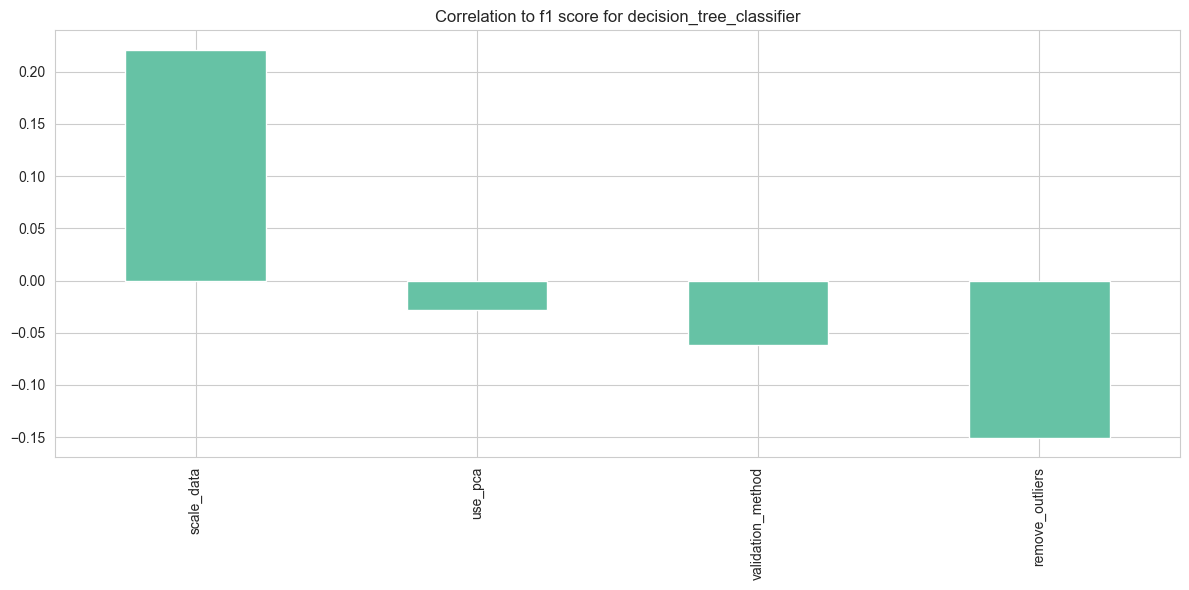

In [135]:
filtered_df = df_corr_results[df_corr_results['algorithm'] == 0]
corr_to_f1 = filtered_df.corr()['f1'].sort_values(ascending=False)
corr_to_f1_sliced = corr_to_f1.drop(['algorithm', 'f1'])
corr_to_f1_sliced.plot(kind='bar')
plt.title(f'Correlation to f1 score for {encoder1.inverse_transform([[0]])[0][0]}')
plt.tight_layout()
plt.savefig(f'images/mat/correlation_{encoder1.inverse_transform([[0]])[0][0]}.png')
plt.show()

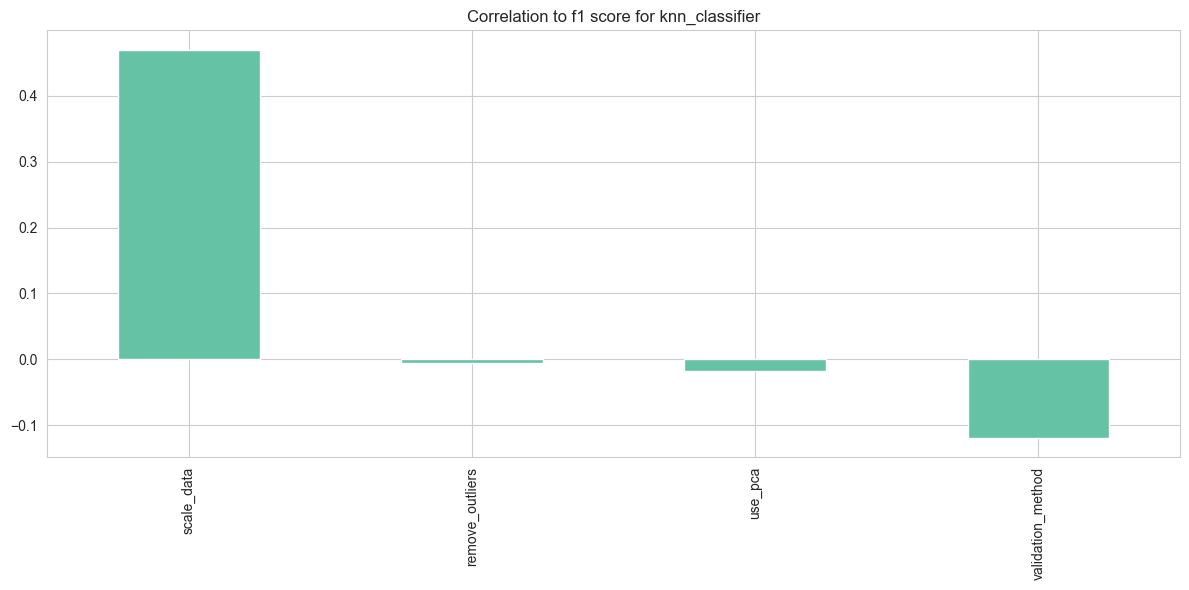

In [136]:
filtered_df = df_corr_results[df_corr_results['algorithm'] == 1]
corr_to_f1 = filtered_df.corr()['f1'].sort_values(ascending=False)
corr_to_f1_sliced = corr_to_f1.drop(['algorithm', 'f1'])
corr_to_f1_sliced.plot(kind='bar')
plt.title(f'Correlation to f1 score for {encoder1.inverse_transform([[1]])[0][0]}')
plt.tight_layout()
plt.savefig(f'images/mat/correlation_{encoder1.inverse_transform([[1]])[0][0]}.png')
plt.show()

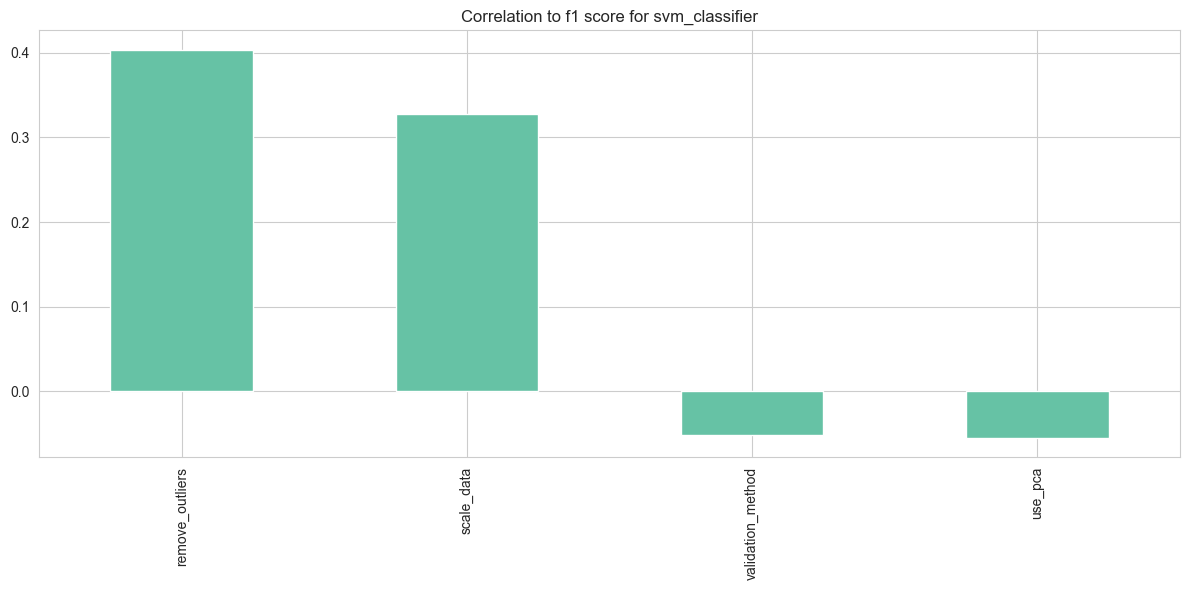

In [137]:
filtered_df = df_corr_results[df_corr_results['algorithm'] == 2]
corr_to_f1 = filtered_df.corr()['f1'].sort_values(ascending=False)
corr_to_f1_sliced = corr_to_f1.drop(['algorithm', 'f1'])
corr_to_f1_sliced.plot(kind='bar')
plt.title(f'Correlation to f1 score for {encoder1.inverse_transform([[2]])[0][0]}')
plt.tight_layout()
plt.savefig(f'images/mat/correlation_{encoder1.inverse_transform([[2]])[0][0]}.png')
plt.show()

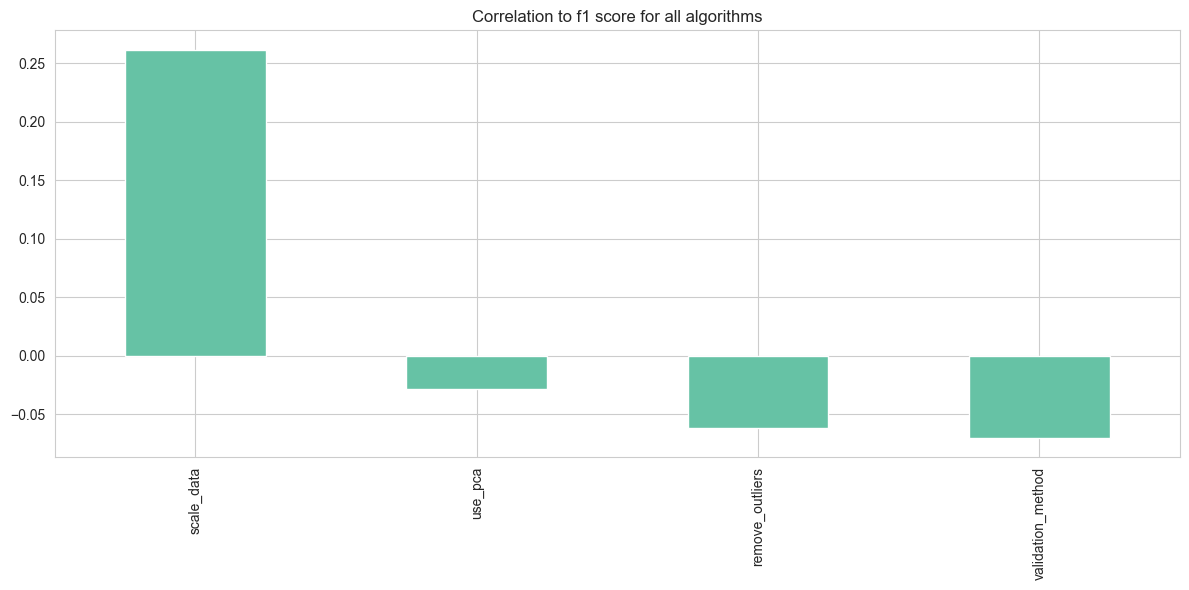

In [138]:
corr_to_f1 = df_corr_results.corr()['f1'].sort_values(ascending=False)
corr_to_f1_sliced = corr_to_f1.drop(['algorithm', 'f1'])
corr_to_f1_sliced.plot(kind='bar')
plt.title(f'Correlation to f1 score for all algorithms')
plt.tight_layout()
plt.savefig(f'images/mat/correlation_all_algorithms.png')
plt.show()